In [133]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats
data = pd.read_csv('data/kc_house_data_clean.csv')

# make all columns in a df viewable
pd.options.display.max_columns = None
pd.options.display.width = None

pd.set_option('display.max_columns', 500)
data


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,0,7399300360,2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,1,8910500230,2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,2,1180000275,2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,3,1604601802,2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,4,8562780790,2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29149,30150,7834800180,2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,NONE,Good,8 Good,Oil,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
29150,30151,194000695,2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,FAIR,Average,7 Average,Gas,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
29151,30152,7960100080,2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,NONE,Average,7 Average,Gas,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
29152,30153,2781280080,2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [134]:
data.corr()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
Unnamed: 0,1.000000,0.000372,-0.003622,-0.003010,-0.005614,-0.006517,-0.004462,0.000819,-0.010384,-0.002705,-0.006947,-0.001143,-0.005116,0.003531,-0.006515,0.009729,0.006126
id,0.000372,1.000000,-0.008708,-0.029935,-0.005515,-0.011827,-0.027763,-0.120910,0.034731,-0.022343,-0.015642,-0.007434,-0.042311,0.022821,-0.029032,-0.000416,0.009142
date,-0.003622,-0.008708,1.000000,0.069478,-0.029961,-0.043785,-0.031536,-0.005700,-0.017355,-0.024830,-0.010925,-0.013979,-0.018595,-0.022002,-0.001781,0.000047,-0.002222
price,-0.003010,-0.029935,0.069478,1.000000,0.290495,0.487628,0.616475,0.087710,0.199827,0.545846,0.246106,0.266830,0.318144,0.105603,0.086405,0.298674,0.086175
bedrooms,-0.005614,-0.005515,-0.029961,0.290495,1.000000,0.593480,0.630777,0.000708,0.195816,0.537544,0.234670,0.304547,0.192298,0.182860,0.011471,-0.018092,0.139669
bathrooms,-0.006517,-0.011827,-0.043785,0.487628,0.593480,1.000000,0.779759,0.038596,0.427976,0.680747,0.260367,0.460901,0.333838,0.455860,0.043702,0.047693,0.185269
sqft_living,-0.004462,-0.027763,-0.031536,0.616475,0.630777,0.779759,1.000000,0.118749,0.356050,0.881627,0.335620,0.503243,0.406078,0.328713,0.036637,0.047682,0.240772
sqft_lot,0.000819,-0.120910,-0.005700,0.087710,0.000708,0.038596,0.118749,1.000000,-0.020554,0.128826,0.001909,0.086642,0.153410,0.012137,0.008112,-0.075330,0.181232
floors,-0.010384,0.034731,-0.017355,0.199827,0.195816,0.427976,0.356050,-0.020554,1.000000,0.506044,-0.243662,0.179823,0.123735,0.521039,-0.015208,0.048404,0.089939
sqft_above,-0.002705,-0.022343,-0.024830,0.545846,0.537544,0.680747,0.881627,0.128826,0.506044,1.000000,-0.074237,0.553498,0.321128,0.428362,0.008155,-0.023803,0.345996


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29154 entries, 0 to 29153
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     29154 non-null  int64  
 1   id             29154 non-null  int64  
 2   date           29154 non-null  int64  
 3   price          29154 non-null  float64
 4   bedrooms       29154 non-null  int64  
 5   bathrooms      29154 non-null  float64
 6   sqft_living    29154 non-null  int64  
 7   sqft_lot       29154 non-null  int64  
 8   floors         29154 non-null  float64
 9   waterfront     29154 non-null  object 
 10  greenbelt      29154 non-null  object 
 11  nuisance       29154 non-null  object 
 12  view           29154 non-null  object 
 13  condition      29154 non-null  object 
 14  grade          29154 non-null  object 
 15  heat_source    29154 non-null  object 
 16  sewer_system   29154 non-null  object 
 17  sqft_above     29154 non-null  int64  
 18  sqft_b

In [136]:
#initial look at data to look at some info
data['sqft_above'].value_counts()

1200    265
1300    262
1060    258
1250    257
1100    243
       ... 
1783      1
1767      1
7700      1
1495      1
2049      1
Name: sqft_above, Length: 1167, dtype: int64

In [137]:
data['heat_source'].value_counts()

Gas                  20148
Electricity           5934
Oil                   2899
Gas/Solar               93
Electricity/Solar       57
Other                   19
Oil/Solar                4
Name: heat_source, dtype: int64

In [138]:
data['sewer_system'].value_counts()


PUBLIC                24834
PRIVATE                4313
PRIVATE RESTRICTED        5
PUBLIC RESTRICTED         2
Name: sewer_system, dtype: int64

In [139]:
# Check for duplicates
data[data.duplicated(subset=['id'])]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
4704,4846,1233100736,2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,NO,NONE,Average,9 Better,Gas,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135


In [140]:
# Verify that duplicate is actually a duplicate
data[data['id'].isin(['1233100736'])]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
4703,4845,1233100736,2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,NO,NONE,Average,9 Better,Gas,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135
4704,4846,1233100736,2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,NO,NONE,Average,9 Better,Gas,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135


In [141]:
# Dropping duplicate row
df = data.drop_duplicates(subset = ['id'])
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,0,7399300360,2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,1,8910500230,2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,2,1180000275,2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,3,1604601802,2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,4,8562780790,2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29149,30150,7834800180,2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,NONE,Good,8 Good,Oil,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
29150,30151,194000695,2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,FAIR,Average,7 Average,Gas,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
29151,30152,7960100080,2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,NONE,Average,7 Average,Gas,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
29152,30153,2781280080,2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [142]:
#Drop columns with missing data
df = df.dropna(subset=['sewer_system', 'heat_source'])
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,0,7399300360,2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,1,8910500230,2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,2,1180000275,2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,3,1604601802,2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,4,8562780790,2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29149,30150,7834800180,2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,NONE,Good,8 Good,Oil,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
29150,30151,194000695,2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,FAIR,Average,7 Average,Gas,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
29151,30152,7960100080,2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,NONE,Average,7 Average,Gas,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
29152,30153,2781280080,2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [143]:
df['address']

0        2102 Southeast 21st Court, Renton, Washington ...
1        11231 Greenwood Avenue North, Seattle, Washing...
2        8504 South 113th Street, Seattle, Washington 9...
3        4079 Letitia Avenue South, Seattle, Washington...
4        2193 Northwest Talus Drive, Issaquah, Washingt...
                               ...                        
29149    4673 Eastern Avenue North, Seattle, Washington...
29150    4131 44th Avenue Southwest, Seattle, Washingto...
29151    910 Martin Luther King Jr Way, Seattle, Washin...
29152    17127 114th Avenue Southeast, Renton, Washingt...
29153    18615 7th Avenue South, Burien, Washington 981...
Name: address, Length: 29153, dtype: object

In [144]:
# This creates a new column with our zipcodes of the houses
df['postal_code'] = data_clean['address'].str[-20:-15]
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,postal_code
0,0,7399300360,2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055
1,1,8910500230,2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133
2,2,1180000275,2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178
3,3,1604601802,2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118
4,4,8562780790,2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29149,30150,7834800180,2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,NONE,Good,8 Good,Oil,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103
29150,30151,194000695,2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,FAIR,Average,7 Average,Gas,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116
29151,30152,7960100080,2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,NONE,Average,7 Average,Gas,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122
29152,30153,2781280080,2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055


In [145]:
# Verify no missing values -- sanity check 
df.isna().sum()

Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
postal_code      0
dtype: int64

In [146]:
# Splitting address into columns
df['City'] = df.address.str.split(',', expand = True)[1]
df['Street'] = df.address.str.split(',', expand = True)[0]
df['State_Zip'] = df.address.str.split(',', expand = True)[2]
df['State_Zip'] = df['State_Zip'].str.strip()
df['Country'] = df.address.str.split(',', expand = True)[3]
df['State'] = df.State_Zip.str.split(' ', expand = True)[0]
df['Zip'] = df.State_Zip.str.split(' ', expand = True)[1]

In [147]:
df = df.drop(columns=['State_Zip', 'address'])
df = df[df['State'] == "Washington"]
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,postal_code,City,Street,Country,State,Zip
0,0,7399300360,2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,47.461975,-122.19052,98055,Renton,2102 Southeast 21st Court,United States,Washington,98055
1,1,8910500230,2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0,47.711525,-122.35591,98133,Seattle,11231 Greenwood Avenue North,United States,Washington,98133
2,2,1180000275,2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,0,47.502045,-122.22520,98178,Seattle,8504 South 113th Street,United States,Washington,98178
3,3,1604601802,2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,2010,0,47.566110,-122.29020,98118,Seattle,4079 Letitia Avenue South,United States,Washington,98118
4,4,8562780790,2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,2012,0,47.532470,-122.07188,98027,Issaquah,2193 Northwest Talus Drive,United States,Washington,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29149,30150,7834800180,2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,NONE,Good,8 Good,Oil,PUBLIC,1600,1130,0,210,1921,0,47.664740,-122.32940,98103,Seattle,4673 Eastern Avenue North,United States,Washington,98103
29150,30151,194000695,2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,FAIR,Average,7 Average,Gas,PUBLIC,2020,0,0,520,2011,0,47.565610,-122.38851,98116,Seattle,4131 44th Avenue Southwest,United States,Washington,98116
29151,30152,7960100080,2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,NONE,Average,7 Average,Gas,PUBLIC,940,920,240,110,1995,0,47.610395,-122.29585,98122,Seattle,910 Martin Luther King Jr Way,United States,Washington,98122
29152,30153,2781280080,2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,1830,740,480,100,2006,0,47.449490,-122.18908,98055,Renton,17127 114th Avenue Southeast,United States,Washington,98055


In [148]:
re = df

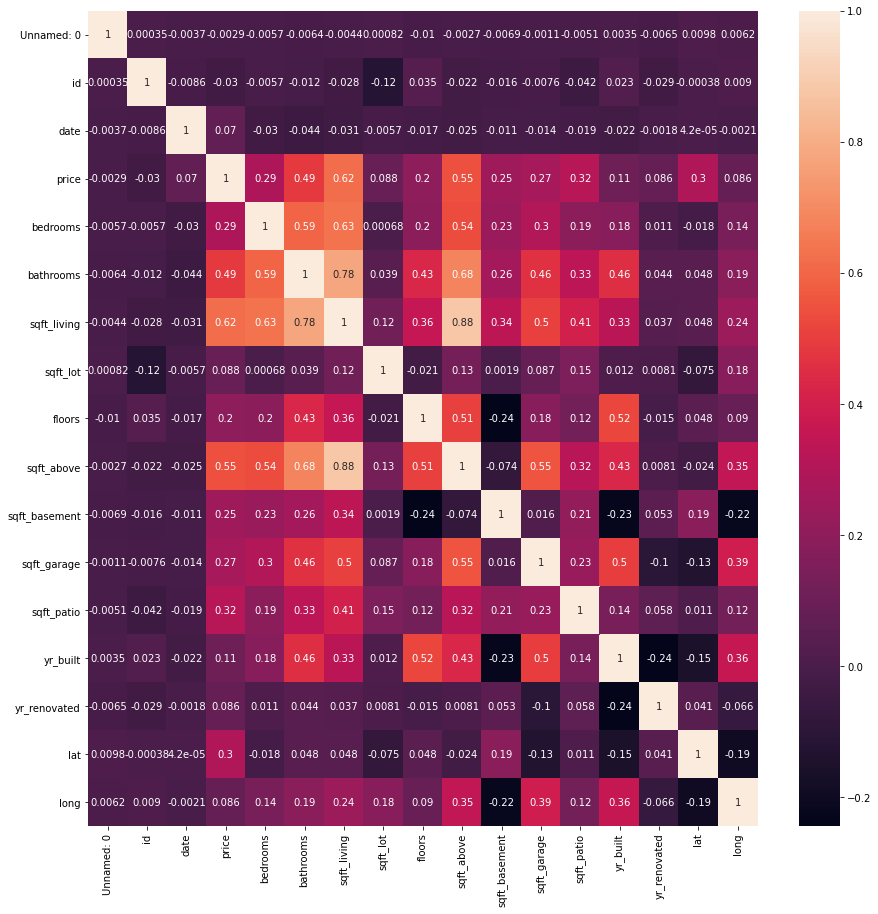

In [149]:
# plot the heatmap to determine correlations
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(re.corr(), annot=True);

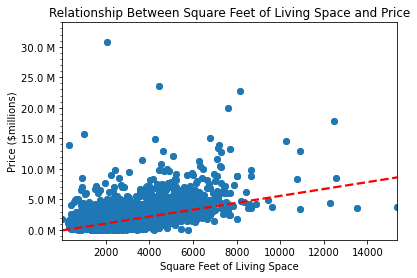

In [150]:
# create plot of square feet of living space vs price
fig, ax = plt.subplots()

plt.scatter(x=re["sqft_living"], y=re["price"])
sns.regplot(data = re, x = 'sqft_living', y = 'price', line_kws={'ls':'--', 'color': 'r'}, ci = None)
ax.set_xlabel('Square Feet of Living Space')
ax.set_ylabel('Price ($millions)')
ax.set_title('Relationship Between Square Feet of Living Space and Price')

# format y axis to show values in millions
def million_formatter(x, pos):
    '''
    Takes two inputs (a tick value ``x`` and a position ``pos``), and returns a 
    string containing the corresponding tick label and the value divided by
    1,000,000 with an M at the end to indicate a value in millions
    '''
    return "%.1f M" % (x/1E6)

ax.set_yticks(range(-1000000, 35000000, 1000000), minor = True)
ax.yaxis.set_major_formatter(million_formatter);


positive relationship between price and living space

In [151]:
# define variables for simple linear regression
y = re['price']
X = re.drop('price', axis = 1)

# split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = .33)

# double check train-test split 
print(f"X_train has {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train has {y_train.shape[0]} rows")


X_train has 19529 rows and 30 columns
y_train has 19529 rows


In [152]:
# select our best correlated predictor, as our X Train
baseline_X_train = X_train[['sqft_living']]

# fit our model and show summary
baseline_train_model = sm.OLS(y_train, sm.add_constant(baseline_X_train)).fit()

# find mean absolute error
baseline_mae = baseline_train_model.resid.abs().sum() / len(y)

# print summary of model performance
baseline_train_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                 1.268e+04
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:03:39   Log-Likelihood:            -2.9013e+05
No. Observations:               19529   AIC:                         5.803e+05
Df Residuals:                   19527   BIC:                         5.803e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -8.768e+04   1.18e+04     -7.462      0.000   -1.11e+05   -6.47e+04
sqft_living   563.5158      5.005    112.593      0.000     553.706     573.326
==============================================================================
Omnibus:                    22615.274   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6187641.816
Skew:                           5.727   Prob(JB):                         0.00
Kurtosis:                      89.447   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""